# **Procesos de Decisión Markovianos (MDP)**

**Alicia Muñiz Jiménez**

25 de Julio de 2023

## **Introducción**

Para entender de manera apropiada que es un Proceso de Decisión Markoviano o MDP, primero se explicarán los conceptos de proceso estocástico, propiedad de Márkov y proceso de Márkov.

### Procesos Estocásticos

Un proceso estocástico es una colección o familia de variables aleatorias { $X_{t}$, con $t \in T$ }, ordenadas según el subíndice $t$ que en general se suele identificar con el tiempo. Se asume que las variables dependen del tiempo y se considera que el proceso representa una serie de tiempo (UPCT, s.f.). Es decir, los procesos estocásticos son la evolución en el tiempo de algún fenómeno cuya dinámica se rige por el azar o en un espacio de probabilidad (no es determinista) y para cada instante $t$ se tiene una variable aleatoria distinta representada por $X_{t}$, donde los valores del tiempos y las variables aleatorias pueden ser de tipo discreto o continuas.  

**Ejemplo:** Las ondas de voz puede ser modeladas con un proceso estocástico, lo cual se aprecia en la siguiente imagen (Dhruv, 2005), donde en el eje Y se tiene la amplitud de la señal y en el eje X el tiempo en segundos.

<img src="Images/Time_audio.jpg" width="300"/>


### Propiedad de Márkov

La propiedad de Márkov nos dice que la probabilidad de alcanzar un estado futuro ($s_{t+1}$) depende sólo del estado actual ($s_{t}$) y no de la historia de los estados anteriores (Grabski, 2015). Esto se debe a que el estado actual captura toda la información relevante de la historia de los estados, es decir, el estado actual es un estadístico suficiente para el futuro (Silver, s.f.).

De esta forma, si $\{S_t\}_t$ es un proceso estocástico, la propiedad de Márkov nos dice que:

$$P(s_{t+1}|s_{t}) = P (s_{t+1}|s_{1}, ..., s_{t}) $$


**Ejemplo:** Un juego de mesa como el monopoly, que usa un dado para que avancen los jugadores en el juego, depende sólo del estado actual del juego y del resultado del dado para saber a qué nuevo estado transitará el jugador y no importa cómo llegó el jugador al estado actual (Amitabh, Malaya y Zakir, 2021).


### Proceso de Márkov

Un proceso estocástico es llamado proceso de Márkov si cumple la propiedad de Márkov; además, los procesos de Márkov están clasificados principalmente de acuerdo con la naturaleza del espacio de estados (Ibe, 2014):

- **Cadena de Márkov:** se tiene un espacio de estados discreto, aunque puede ser continua o discreta en el tiempo.  
- **Proceso de Márkov:** se tiene un espacio de estados continuo, aunque puede ser continuo o discreto en el tiempo.  

Tanto en la investigación como en la práctica las cadenas de Márkov son las más usadas, ya que son lo suficientemente complejas para describir ciertas características no triviales de los sistemas, pero al mismo tiempo son lo suficientemente sencillas para ser analizadas matemáticamente (Rincón, 2012). Además, pueden aplicarse a una amplia gama de fenómenos científicos y sociales. De hecho, las cadenas de Markov fueron introducidas por Andrey Markov con la intención de crear un modelo probabilístico para analizar la frecuencia con la que aparecen las vocales en los poemas y textos literarios (Rincón, 2012). No obstante, ahora su aplicación es tan extensa que sirven incluso para analizar problemas de cognición o aprendizaje, lo cual se ha trasladado hasta la inteligencia artificial, por ejemplo, en los algoritmos de aprendizaje por refuerzo.

Por otra parte, la matriz que describe las probabilidades de transición entre los diferentes estados de un proceso de Markov se llama **matriz de transición** (*P*), donde si el número de estados es finito (*k*), entonces se tendrá una matriz cuadrada cuya dimensión será de *k x k*.  



\begin{equation*}
P =
\begin{bmatrix}
P_{1,1} & P_{1,2} & \cdots & P_{1,k} \\
P_{2,1} & P_{2,2} & \cdots & P_{2,k} \\
\vdots  & \vdots  & \ddots & \vdots  \\
P_{k,1} & P_{k,2} & \cdots & P_{k,k}
\end{bmatrix}
\end{equation*}

Además, esta matriz ha de cumplir otras propiedades como las siguientes (University of Auckland, s.f.):

- Todas las entradas de $P_{ij}$ tienen valores no negativos y su valor corresponde a la probabilidad condicional de ir del estado *i* al *j* (a estas probabilidades se les conoce también como probabilidades de un paso).

 $$P_{ij} = P (s_{t+1} = s_j | s_{t}=s_i)$$

- La suma de las entradas de cada fila deben ser igual a 1.

Es importante aclarar que un proceso de Markov está completamente definido una vez que se especifica su matriz de transición y su estado inicial (Pinsky y Karlin, 2011). Adicionalmente,  se considera que una cadena de Markov es estacionaria u homogénea en el tiempo si la distribución de la cadena con una matriz de transición P es un vector, $v$, tal que $v P = v$, es decir, no importa cuál es el estado inicial sino que la proporción que pasa la cadena en el estado $j$ es aproximadamente $v_{j}$ para todas las $j$ (Goldman, 2008).

**Nota:** un proceso es estacionario en sentido estricto sí es independiente del tiempo (para mayor información ver el apéndice I).

La siguiente imagen muestra un ejemplo sencillo de un proceso de Márkov con su diagrama de transición con 2 estados (A y B) y su correspondiente matriz de transición, donde las filas representan el posible estado actual y las columnas los posibles estados futuros.

<img src="Images/X.png" width="300"/>

## Proceso de Decisión Markoviano

Un Proceso de Decisión Markoviano (MDP por sus siglas en inglés) es un problema de decisión secuencial en un ambiente totalmente observable y estocástico, con un modelo de transición Markoviano (propiedad de Markov).
Un MDP es una 4-tupla, $\mu= (S, A, R, P)$, que consiste en lo siguiente (Russel y Norvig, 2022):

- Un conjunto de estados, $ s\in S $.
- Un conjunto de acciones, $ a \in A $.
- Una función de recompensa, $R (s,a ,s')$.
- Probabilidades de transición, $P(s'|s,a)$.

**Nota:** por facilidad de notación se usa $s' = s_{t+1}$ y $s = s_{t}$.



Los MDP son una forma de idealización matemática para problemas de aprendizaje por reforzamiento donde un agente aprende de la interacción con su ambiente para alcanzar una meta (Vinay, Shiuann-Shuoh, Minal, Brijesh, Arpan, Agam, 2022). En un MDP un agente y el ambiente interactúan en una secuencia de pasos temporales discretos y en cada paso *t* el agente recibe una representación del estado en el ambiente en el que está, con base en ello el agente luego selecciona una acción y como resultado recibe una recompensa y transita a un nuevo estado (Doya, 2023). Esto se puede apreciar de forma gráfica en el diagrama de abajo de los autores Sutton y Barto (2018).

<img src="Images/RL-MDP.png" width="300"/>


Es importante notar que en cada paso temporal el agente implementa un mapeo de la probabilidad en el estado actual para elegir una acción, a lo cual se le conoce como la *política* del agente ($π_{t}$ o $π$), donde $π (a|s)$ es la probabilidad de elegir la acció $a$ en el estado $s$, mientras que $π(s)$ es la acción recomendada por la política $π$ en el estado $s$ (Sutton et. al, 2018; Russel et. al, 2022). Es decir, la política es la solución que especifica lo que el agente debe hacer en cada estado que alcance. Dada la propiedad estocástica del entorno en un MDP, entonces cada vez que una política es ejecutada esta termina en una historia del ambiente diferente y, por ello, la calidad de una politica es medidad con la utilidad esperada ($U$) de las posibles historias de los entornos generados por esa política (Russel et. al, 2018).

### Función de utilidad

La función de utilidad que describe la utilidad esperada obtenida de ejecutar la política $π$ empezando en el estado $s$ es la siguiente:
  

$$
U^{π} (s) = E \left[\sum_{t=0}^{∞} γ^t R(s, \pi(s), s') \right]
$$

Donde:

- **γ** = Factor de descuento que puede tomar valores entre 0 y 1. Entre más cercano sea su valor a 1 significa que el agente está más dispuesto a esperar por las recompensas a largo plazo.  

### Función de valor

Por otra parte, **la función de valor** parte de la función de utilidad, sólo que está condicionada al estado actual. Esta pequeña modificación permite estimar qué tan bueno es para el agente estar en un estado. Su ecuación es la siguiente:

$$
 v_{π} (s) = E \left[\sum_{t=0}^{∞} γ^t R(s, \pi(s), s')  \bigg\vert  S_{t}=s\right]
 =  \sum_{a} π(a|s)\sum_{s'. r} P(s', r| s, a)[r + γv_{\pi}(s')] \\
$$



Adicionalmente, una política óptima ($π^{*}$) es aquella que tiene el valor más alto de la utilidad esperada, es así que si se asume que el agente usa una política óptima, entonces la función de valor sería la siguiente:





$$
 v_{π^*} (s)= max_{π} v_{\pi}(s) = max_a
\sum_{s'. r} P(s', r| s, a)[r + γv_{\pi^*}(s')]
$$

Por otro lado, es importante diferenciar entre un ambiente con un **horizonte finito o infinito**, ya que esto impactará en la política del agente. A diferencia de un horizonte infinito, en el horizonte finito existe un número fijo $N$ de pasos temporales que el agente puede ejecutar y en ese caso las acciones elegidas dependen del tiempo que resta, teniendo una **política no estacionaria** (Russel et. al, 2018). En cambio, cuando no existe tiempo límite, entonces tampoco hay razón para actuar diferente en el mismo estado en diferentes ocasiones, por ende, la política depende sólo del estado actual y no del tiempo, lo que se conoce como una **política estacionaria**.  


### Función de valor-acción

Otro concepto importante es la **función de valor-acción** para una política $\pi$, misma que estima el valor de tomar la acción $a$ en el estado $s$ bajo la política $\pi$ (Sutton et. al, 2018). Si se está usando la política óptima se tiene la siguiente ecuación (Russel et. al, 2022):

$$
q(s,a) = \sum_{s'} P(s',r| s,a)[r+ γmax_{a'}q_{π^*}(s', a')]  
$$

**Nota:** Es común usar una **tabla q** para guardar y actualizar los valores de cada acción por cada estado, donde las filas representan los estados y las columnas las acciones.

## Algoritmos de Policy Iteration

Existen diferentes algoritmos para resolver un MDP y algunos de los más conocidos dependen de los métodos de aprendizaje de Programación Dinámica (DP), Monte Carlo (MC) o por Diferencias Temporales(TD). En este notebook sólo se produnfizará en el algortimo de **policy iteration** para ejemplificar cómo resolver un MDP, esto porque conocerlo es importante teóricamente para entender algoritmos posteriores que se basan en él. Cabe aclarar que este algoritmo pertenece a la programación dinámica y por lo mismo para usarlo se necesita tener conocimiento total del entorno en el que estará el agente, así como que es un método computacionalmente costoso (Sutton et. al, 2018). No obstante, para el ejemplo simple de este notebook no representa ningún problema.  A continuación se muestra el algoritmo de *policy iteration*:

<img src="Images/PI.jpeg" width="500"/>

### Aplicación del algoritmo

Se aplicará el algorito de policy iteration a un problema de encontrar el camino desde un punto A a un punto B en donde dentro del ambiente hay estados con recompensa negativa. Además el entorno es no determinista, pues una acción puede verse afectada por un parámetro de "resbalo", de tal forma que podemos terminar en un estado diferente al esperado con cierta probabilidad. El entorno se exporta desde la paquetería de <tt>gymnasium</tt>.

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Creación del ambiente virtual de Frozen Lake**

Para la creación del ambiente utilizamos <tt>gymnasium</tt>: en particular, se carga el entorno <tt>Frozen-Lake</tt> que está definido por una cuadrícula en donde el agente busca llegar de un punto A hacia una meta B. El entorno presenta obstáculos o estados antagónicos en donde la recompensa que se recibe es negativa. 

Asimismo, el entorno es no determinista, pues existe la probabilidad de "resbalar", de tal forma que la ejecución de una acción $a$ en un estado $s$ puede llevar a más de un estado con cierta probabilidad. Esto se introduce por el comando <tt>is_slippery = True</tt> que implica que el suelo está resbaloso y hace que el agente se mueva con una probalidad de 1/3 a la casilla deseada y con un 1/3 de probabilidad a las casillas perpendiculares a la acción deseada.

![frozen-lake](Images/FrozenLake.gif)

In [2]:
#creación del entorno
env = gym.make("FrozenLake-v1",desc=["SFFF", "FHFF", "FFHF", "FFFG"], is_slippery=True, render_mode="ansi")
#Acciones
action_names = {0:'Izquierda', 1:'Abajo', 2:'Derecha',3:'Arriba'}

print('Número de estados: ', env.observation_space)
# acciones: izquierda = 0, abajo = 1, derecha = 2 y arriba = 3
print('Número de acciones: ', env.action_space)

Número de estados:  Discrete(16)
Número de acciones:  Discrete(4)


En este entorno, los resultados de aplicar a una acción $a$ en un estado $s$ se obtienen mediante la función <tt>env.unwrapped.P[s][a]</tt>. La salida de esta fuunción nos da la probabilidad y el posible estado resultante.

In [3]:
# La salida es una lista, donde cada entrada representa una de las acciones probables dada la acción elegida con las siguientes variables:
# (probailidad de transición, siguiente estado, recompenza, ¿Es un estado terminal?)
env.unwrapped.P[0][1]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

#### Evualuación de la política

El algoritmo de iteración de la política consiste de dos pasos: la evaluación y el mejoramiento. En la evaluación de la política se estima la función de valor de los estados $V(s)$ por medio de una actualización de la forma:

$$V(s) \leftarrow \mathbb{E}_\pi[G_t|S_t =s] = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s, a)[r + \gamma V(s')]$$

Es decir, se estima como el retorno esperado de estado de forma recursiva. En este caso, asumimos que cada acción tiene una probabilidad uniforme, por lo que la función de valor se estiam sólo como $V(s) \leftarrow \sum_{s',r} p(s',r|s, a)[r + \gamma V(s')]$. Asmimismo, se calculan los valores $\Delta$ como el máximo entre el valor anterior y la diferencia entre los valores del estado $s$.

In [4]:
def policy_evaluation(env, policy_vec, val_fun_vec, conv_tolerance, discount=0.9):
    """Evaluación de la política"""
    while True:
        delta = 0
        for state in env.unwrapped.P:
            prev_val = val_fun_vec[state]
            #Cálculo del retorno esperando
            expected_return = sum([prob*(reward + discount*val_fun_vec[next_state]) 
                                      for prob,next_state,reward,is_terminal_state 
                                      in env.unwrapped.P[state][policy_vec[state]]])
            #Actualización de los valores
            val_fun_vec[state] = expected_return
            #Actualización de delta
            delta = np.max([delta, np.abs(prev_val - val_fun_vec[state])])

        if(delta < conv_tolerance):
            return policy_vec, val_fun_vec, delta

#### Mejoramiento de la política

En el mejoramiento de la política, se actualizan los valores de las acciones que la política elige en cada estado. Para esto, se determina una mejor política a partir de la actualización:

$$\pi \leftarrow \mathbb{E}_\pi[R_{t+1} + \gamma v_\pi(s)|S_t = s, A_t=a] =  \arg\max_a \sum_{s',r} p(s',r|s,a) [r+\gamma V(s')]$$

El algoritmo se deteien cuando la política se estabiliza; es decir, cuando los valores de la política en la iteración anterior son los mismos que en la actual.

In [5]:
def policy_improvement(policy_vec, val_fun_vec, policy_stable_vec, discount=0.9):
    """Mejoramiento de la política"""
    for state in env.unwrapped.P:
        old_action = policy_vec[state]
        #Cálculo de los valores de acción
        action_values = np.zeros(env.action_space.n)
        for action_p in env.unwrapped.P[state]:
            action_values[action_p] = sum([prob*(reward + discount*val_fun_vec[next_state]) 
                                           for prob, next_state, reward, is_terminal_state 
                                           in env.unwrapped.P[state][action_p]])
        #Acción de mayor valor
        policy_vec[state] = np.argmax(action_values)
        
        if old_action == policy_vec[state]:
            policy_stable_vec[state] = True
            
    return policy_vec, policy_stable_vec

### Policy Iteration

Finalmente, definirmos el algoritmo de iteración de la política por medio de la aplicación de la evaluación de la política y el mejoramiento de la política. El algoritmo tomará el problema y regresará la política y la función de valor que aprende a partir del problema dado.

In [6]:
def policy_iteration(env, discount = 0.9, conv_tolerance=1e-4, max_iterations=100):
    """Algoritmo de iteración de política"""
    #Vector de estabilidad
    policy_stable_vec = np.zeros(env.observation_space.n, dtype=bool)
    #Función de valor
    val_fun_vec = np.zeros(env.observation_space.n)
    #Política
    policy_vec = np.ones(env.observation_space.n, dtype=int)
    for iterations in range(max_iterations):
        #Evaluación de política
        policy_vec, val_fun_vec, delta = policy_evaluation(env, policy_vec, val_fun_vec, 
                                                                       conv_tolerance, discount=discount)
        #Mejoramiento de la política
        policy_vec, policy_stable_vec = policy_improvement(policy_vec, val_fun_vec, policy_stable_vec, 
                                                           discount=discount)
        
        if np.all(policy_stable_vec == True):
            return policy_vec, val_fun_vec

Aplicamos el algoritmo al problema definido del Frozen-Lake para otener la política y la función de valor:

In [7]:
#ejecución del algoritmo de policy iteration
policy_vec, val_fun_vec = policy_iteration(env, discount=0.5)

#### Resultados

Podemos observar los resultados obtenidos a partir del algoritmo de iteración de la polítcia. Visualizamos la función de valor de los estados y las acciones determinadas.

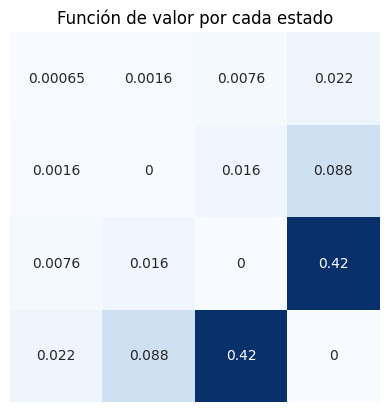

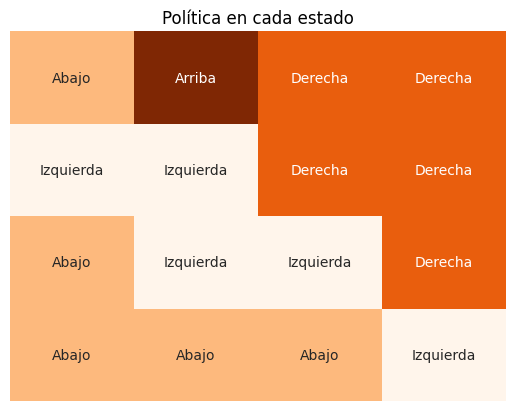

In [8]:
def values_print(valueFunction,reshapeDim=4):
    ax = sns.heatmap(valueFunction.reshape(reshapeDim,reshapeDim),annot=True, square=True,cbar=False, 
                     cmap='Blues',xticklabels=False, yticklabels=False)
    plt.title('Función de valor por cada estado')
    plt.show()

def actions_print(policy_vec,reshapeDim=4):
    ax = sns.heatmap(policy_vec.reshape(reshapeDim,reshapeDim),annot=np.array([action_names[a] for a in policy_vec]).reshape(reshapeDim,reshapeDim), 
                     fmt='',cbar=False, cmap='Oranges',xticklabels=False, yticklabels=False)
    plt.title('Política en cada estado')
    plt.show()

values_print(val_fun_vec)
actions_print(policy_vec)

### Prueba de la política

Finalmente, probamos la política en un entorno para determinar el cómo trabaja la política elegida.

In [9]:
env.reset()
n_episodes_t = 2
for e in range(1, n_episodes_t+1):
    current_state = env.reset()[0]
    done = False
    score = 0
    actions = []
    while done == False:
        #Acción ambiciosa
        action = policy_vec[current_state]
        actions.append(action_names[action])
        #Se obtienen los resultados del ambiente por la acción elegida
        state, reward, done, _,_= env.step(action)
        score += reward
        #Se transita al nuevo estado
        current_state = state

    print('Episodio: {}\n\tAcciones: {};\n\tPuntaje: {}'.format(e, actions, score))

env.close()

Episodio: 1
	Acciones: ['Abajo', 'Abajo', 'Abajo', 'Arriba', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha', 'Derecha'];
	Puntaje: 1.0
Episodio: 2
	Acciones: ['Abajo', 'Abajo', 'Abajo', 'Abajo', 'Izquierda', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo', 'Abajo'];
	Puntaje: 1.0


### Ejercicios:

    1) Corre de nuevo el apartado "prueba de la política", si en algún episodio el agente obtiene un puntaje de 0.0, ¿esto cómo lo justificarías?

    2) Si se inicializa el ambiente y el policy_vec de la siguiente forma:
    
      env=gym.make("FrozenLake-v1",desc=["SFFF", "FHFF", "FFH", "FFFG"], is_slippery=True, render_mode="human")
      policy_vec = np.zeros(env.observation_space.n, dtype=int).
     
      Entonce, qué pasa con el algorimto en la parte de entrenamiento y explica a qué se debe esto. Pista: pon atención en el penúltimo estado del entorno (el último es la meta o el estado terminal).

     3) Si se inicializa el ambiente de la siguiente forma (is_slippery=False):

        env=gym.make("FrozenLake-v1",desc=["SFFF", "FHFF", "FFHF", "FFFG"], is_slippery=False, render_mode="human")

       Entonces, ¿el policy_vec cambia sus valores? ¿A qué se debe que cambie o no sus valores?

**Referencias:**

- Universidad Politécnica de Cartagena (UPCT). (s.f.). Introducción a los Procesos Estocásticos. Departamento de Matemáticas Aplicadas y Estadística (DMAE). Recuperado el 25 de julio de 2023. https://halweb.uc3m.es/esp/personal/personas/jmmarin/esp/pest/tema2pe.pdf

- Dhruv, L. (2005). Audio Signal Filtering. Recuperado el 25 de julio de 2023. https://www.projectrhea.org/rhea/index.php/Audio_Signal_Filtering

- Grabski, F. (2015). 1 - Discrete state space Markov processes en
F. Grabski (Ed.), Semi-Markov Processes: Applications in System Reliability and Maintenance (pp. 1-17). Elsevier.
https://doi.org/10.1016/B978-0-12-800518-7.00001-6.


- Amitabh, B., Malaya, D. B. and Zakir, H. (2021). Chapter Eleven - Music recommender system using restricted Boltzmann machine with implicit feedback in S. Kim and G. Chandra Deka (Eds.), Advances in Computers (vol. 122, pp. 367-402). Elsevier.
https://doi.org/10.1016/bs.adcom.2021.01.001.


- Russel, S. y Norvig, P. (2022). Making Complex decisions, in Artificial intelligence: A Modern Approach (2ª ed., pp. 552-586). Pearson.

- Doya, K. (2023).Reinforcement Learning, in R. Sun (Ed.), The Cambridge Handbook of Computational Cognitive Sciences (2nd ed., pp. 350-380). Cambridge: Cambridge University Press. doi:10.1017/9781108755610

- Vinay, S., Shiuann-Shuoh, C., Minal, S., Brijesh, N. Arpan, K. y Agam, G. (2022). How are reinforcement learning and deep learning algorithms used for big data based decision making in financial industries–A review and research agenda, International Journal of Information Management Data Insights, 2 (2). https://doi.org/10.1016/j.jjimei.2022.100094.

- Sutton, R. y Barto, A. (2018). Reinforcement learning: An introduction (2ª ed.). The MIT Press.  

- Silver, D. (s.f.). Markov Decision Processes [presentación]. Recuperado el 25 de julio de 2023. https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf

- Sala, A. (2021). Procesos estocásticos estacionarios [presentación]. Univaersidad Politécnica de valencia. recuperado el 27 de julio de 2023. http://personales.upv.es/asala/DocenciaOnline/material/estocs3stac.pdf

- Montañés-Bernal, A. (2008). Tema 1. Procesos estacionarios [presentación]. Universidad de Zaragoza. Recuperado el 27 de julio de 2023. https://personal.unizar.es/amontane/doc/ts/tema1.pdf

- The University of Auckland. (s.f.). Chapter 8: Markov Chains [PDF]. Recuperado el 27 de julio de 2023. https://www.stat.auckland.ac.nz/~fewster/325/notes/ch8.pdf

- Goldman, M. (2008). 1 Markov Chains - Stationary Distributions [course notes]. Berkeley. https://www.stat.berkeley.edu/~mgoldman/Section0220.pdf

- Ibe, O. (2014). Chapter 12 - Special Random Processes. In Fundamentals of Applied Probability and Random Processes (2nd ed., pp. 369-425). Academic Press. https://www.sciencedirect.com/book/9780128008522/fundamentals-of-applied-probability-and-random-processes#book-description

- Pinsky, M. A. y Karlin, S. (2011). Markov Chains: introduction. En An introduction to Stochastic modeling (4ª ed., pp. 79-163). Academic Press. https://doi.org/10.1016/C2009-1-61171-0

- Rincón, L. (2012). Procesos Estocásticos. Las Prensas de Ciencias. http://lya.fciencias.unam.mx/lars/libros/procesos2012.pdf

## Apéndice I

### Procesos estacionarios vs no estacionarios

A diferencia de un proceso estocástico **no estacionario** que depende del tiempo, un proceso es **estacionario en sentido estricto** sí es independiente del tiempo y, por lo tanto, para todo conjunto finito de instantes $t_{1}, t_{2}, ..., t_{n} $ con n arbitraria la función de densidad conjunta no cambia con un desplazamiento temporal $τ \in  \mathbb R $ (Sala, 2021). Es decir, los momentos estadísticos y los momentos estadísticos conjuntos son constantes.

$$
f_{t_{1}, ..., t_{n}} (X_{1}, ..., X_{n}) = f_{t_{1} + τ, ..., {t_{n}+τ}} (X_{1}, ..., X_{n})
$$

Un proceso estocástico es **estacionario en el sentido amplio** si se conserva constante, no la función de densidad completa, sino solamente lo siguiente (Montañés-Bernal, 2008):

- La media y varianza son constantes (no dependen del tiempo).
$$
E ( y_{t} ) = μ ∀ t
$$
$$
Var ( y_{t} ) = σ^{2} ∀ t
$$
- La covarianza (y la correlación) sólo depende de la distancia en tiempo entre los instantes comparados.

$$
Cov (y_{i}, y_{j}) = Cov (y_{k+i}, y_{k+j}) = γ (i-j) = γ (j-i) ∀ i \neq j
$$